We will be using K-Prototype to cluster the data since the data consists of categorical and numerical data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('readytoclust.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2209 non-null   object 
 1   Marital_Status       2209 non-null   object 
 2   Income               2209 non-null   float64
 3   Kidhome              2209 non-null   int64  
 4   Teenhome             2209 non-null   int64  
 5   MntWines             2209 non-null   int64  
 6   MntFruits            2209 non-null   int64  
 7   MntMeatProducts      2209 non-null   int64  
 8   MntFishProducts      2209 non-null   int64  
 9   MntSweetProducts     2209 non-null   int64  
 10  MntGoldProds         2209 non-null   int64  
 11  NumDealsPurchases    2209 non-null   int64  
 12  NumWebPurchases      2209 non-null   int64  
 13  NumCatalogPurchases  2209 non-null   int64  
 14  NumStorePurchases    2209 non-null   int64  
 15  NumWebVisitsMonth    2209 non-null   i

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

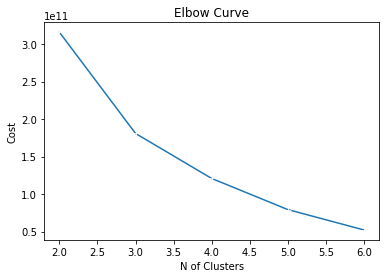

In [7]:
# Function for plotting elbow curve
from kmodes.kprototypes import KPrototypes
Poscatcol = [data.columns.get_loc(i) for i in data.loc[:, data.dtypes == 'object'].columns]
cost = []
for i in range(2,7):
    clust = KPrototypes(n_clusters = i,init='Huang', random_state = 42)
    clust.fit_predict(data,categorical = Poscatcol)
    cost.append(clust.cost_)
    
sns.lineplot(x = range(2,7),y = cost,marker = "+",dashes = True)
plt.title('Elbow Curve')
plt.xlabel('N of Clusters')
plt.ylabel('Cost')
plt.plot

In [8]:
#I decide to cluster the data into 3 cluster based on the Elbow Curve.
#7 cluster might be better but sometimes we don't want to group our customers into many segments since it will also
#give ourselves a hard time.
finalclust = KPrototypes(n_clusters = 3, init='Huang',random_state = 42)
finalclust.fit_predict(data,categorical = Poscatcol)
final = data.loc[:]
final['segments'] = finalclust.labels_
final.segments.value_counts()

2    784
0    740
1    685
Name: segments, dtype: int64

We have 25 variables. In real life projects, it is impossible to give the interpretation of all 26 variables to your user(s). Basically we have 2 alternatives. We could reduce the data before clustering (eg. we use PCA, Variance Threshold, etc.) or we could model the data as supervised learning, take a look at the feature importances, then pick few variables that are relevant enough to take a look at. In this opportunity, I chose the latter.

In [9]:
#Export the data to model
tomodelandinterpret=final.to_csv('model and plot.csv')